In [1]:
import csv
wpx = []
wpy = []
wps = []
wpdx = []
wpdy = []
with open('../data/highway_map.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=' ')
    for row in reader:
        wpx.append(float(row[0]))
        wpy.append(float(row[1]))
        wps.append(float(row[2]))
        wpdx.append(float(row[3]))
        wpdy.append(float(row[4]))

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
LIMIT = 50

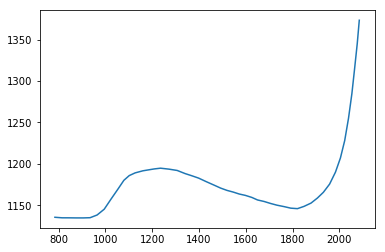

In [110]:
plt.plot(wpx[:LIMIT], wpy[:LIMIT])

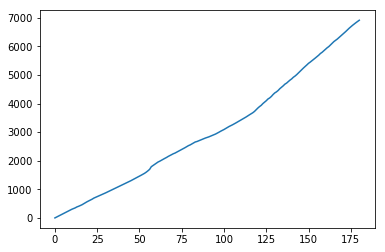

In [5]:
plt.plot(wps[:LIMIT])

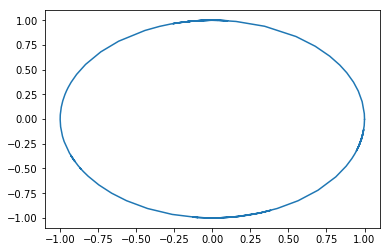

In [6]:
plt.plot(wpdx[:LIMIT], wpdy[:LIMIT])

In [8]:
x, y, s, d = 909.48, 1128.67, 124.834, 6.16483

In [105]:
import math
def dis(x0, y0, x1, y1):
    return math.sqrt((x0 - x1) ** 2 + (y0 - y1) ** 2)

class Sim:
    def __init__(self, x, y, s, d):
        self.x = [x]
        self.y = [y]
        self.s = [s]
        self.d = [d]
        self.sd = []
        self.sdd = []
        self.sddd = []
    def update(self, X, Y):
        self.x.append(X[0])
        self.y.append(Y[0])
        d = dis(self.x[-1], self.y[-1], self.x[-2], self.y[-2])
        self.s.append(self.s[-1] + d)
        self.sd.append(d / 0.02)
        if len(self.sd) > 1:
            self.sdd.append((self.sd[-1] - self.sd[-2]) / 0.02)
        if len(self.sdd) > 1:
            self.sddd.append((self.sdd[-1] - self.sdd[-2]) / 0.02)
    def draw(self):
        plt.plot(wpx[:LIMIT], wpy[:LIMIT])
        plt.plot(self.x, self.y, c='r')
        



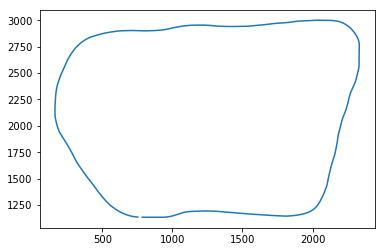

In [47]:
x, y, s, d = 909.48, 1128.67, 124.834, 6.16483
sim = Sim(x, y, s, d)
#for i in range(1000):
#    sim.update([x + i], [y + i])
sim.draw()

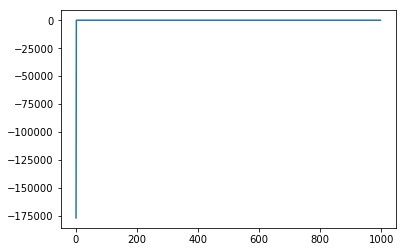

In [17]:
plt.plot(sim.sddd)

In [37]:
for i, ws in enumerate(wps):
    if ws >= s:
        next_wps = i - 1
        break
X = wpx[next_wps: next_wps + 4]
Y = wpy[next_wps: next_wps + 4]
S = wps[next_wps: next_wps + 4]
from scipy.interpolate import interp1d
spx = interp1d(S, X, kind='cubic')
spy = interp1d(S, Y, kind='cubic')
print(X, Y)

[905.283, 934.9677, 964.7734, 995.2703] [1134.799, 1135.055, 1138.318, 1145.318]


In [38]:
from scipy.interpolate import interp1d
import numpy as np
f = interp1d(X, Y)
f2 = interp1d(X, Y, kind='cubic')

In [39]:
xnew = np.linspace(X[0], X[-1], num=20, endpoint=True)

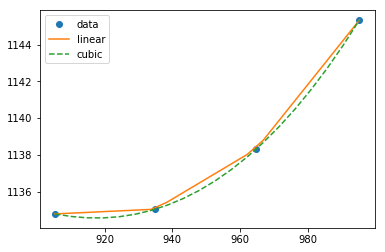

In [40]:
plt.plot(X, Y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')

181


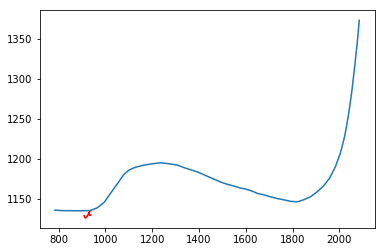

In [124]:
x, y, s, d = 909.48, 1128.67, 124.834, 6.16483
sim = Sim(x, y, s, d)

#v = sim.sd[-1]
#vd = sim.sdd[-1]
v = 10
print(len(wps))
for j in range(200):
    
    #v = sim.sd[-1] if sim.sd else 0
    #vd = sim.sdd[-1] if sim.sdd else 0
    news = sim.s[-1]
    dt = 0.02
    
    for i, ws in enumerate(wps):
        if ws >= news:
            next_wps = i - 1
            break
            
    #print(next_wps)
    X = [wpx[next_wps]] + [sim.x[-1]] + wpx[next_wps + 1: next_wps + 10]
    Y = [wpy[next_wps]] + [sim.y[-1]] + wpy[next_wps + 1: next_wps + 10]
    S = [wps[next_wps]] + [sim.s[-1]] + wps[next_wps + 1: next_wps + 10]
    #print(X, Y, S)
    spx = interp1d(S, X, kind='cubic')
    spy = interp1d(S, Y, kind='cubic')
    
    X = []
    Y = []
    #print(v)
    for i in range(50):
        news += v * dt
        #if v < 50 * 1608 / 3600:
        #    v += 0.2
        #print(news, spx(news), spy(news))
        X.append(spx(news))
        Y.append(spy(news))
    sim.update(X, Y)
    #print(j)
sim.draw()

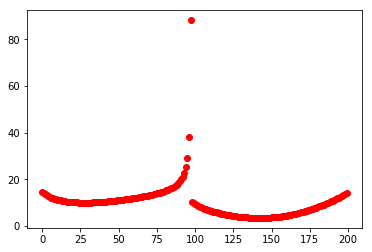

In [125]:
#print(sim.sd)
plt.plot(sim.sd, 'ro')
#plt.plot(sim.sdd)
#plt.plot(sim.sddd)